#**Analisando a Violência no Rio de Janeiro**

A criminalidade no Brasil não é algo passageiro para a nossa nação. Visto que das 50 cidades mais violentas no mundo, 17 estão localizadas no Brasil. Vêmos cada vez mais noticiários que ganham espaço na televisão para divulgar crimes e outras atrocidades cometidas.

Com a lei do acesso à informação, podemos acessar diversos dados disponibilizados pelo Governo. Um deles é a Violência no Rio de Janeiro.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do portal ISPDados. Com isso, faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.

##Obtenção dos Dados
O dataset foi obtido pela página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro (ISPDados).

Os dados desse dataset são obtidos a partir de Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro. Os RO's antes de serem consolidados pelo ISP, são verificados, garantindo um controle de qualidade dos dados apresentados.

No caso do dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente [neste link.](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv)

###Importando as Bibliotecas
Para todo o nosso Notebook, utilizaremos o pandas (para manusear o Dataset), pyplot e o seaborn (para imprimir gráficos).

In [0]:
#Importando as bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Importando o DataSet
O atual Dataset está disponibilizado no Github do professor Carlos Melo e, sendo assim, utilizaremos a versão Raw desse DataSet.

In [19]:
#Importando o Dataset do Github:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv')

#Apresentando os primeiros 5 valores:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


##Analise Inicial dos Dados
Com o Dataset e as bibliotecas instaladas na maquina virtual, podemos começar a analisar alguns dados presentes nele:

###Q1. Qual o tamanho desse DataSet?
Para descobrirmos as dimensões desse dataset, utilizamos o atributo ".shape" que nos retorna uma tupla com dois valores: quantidade de linhas, quantidade de colunas.

In [20]:
print('O Dataset possui {} linhas'.format(df.shape[0]))
print('O Dataset possui {} colunas'.format(df.shape[1]))

O Dataset possui 344 linhas
O Dataset possui 56 colunas
O Dataset possui 344 linhas
O Dataset possui 56 colunas


###Q2. Quais são os tipos das variáveis?
Outro passo importante para essa analise inicial é identificar quais são os tipos de dados existentes, podemos utilizar o atributo ".dtypes" ou ".info" para descobrirmos.

O atributo ".info" retorna algumas informações adicionais, por isso, acabo utilizando ela (gosto pessoal).

In [21]:
#Identificando os tipos de dados das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
vano                          344 non-null int64
mes                           344 non-null int64
hom_doloso                    344 non-null int64
lesao_corp_morte              248 non-null float64
latrocinio                    344 non-null int64
hom_por_interv_policial       260 non-null float64
tentat_hom                    344 non-null int64
lesao_corp_dolosa             344 non-null int64
estupro                       200 non-null float64
hom_culposo                   260 non-null float64
lesao_corp_culposa            248 non-null float64
roubo_comercio                344 non-null int64
roubo_residencia              344 non-null int64
roubo_veiculo                 344 non-null int64
roubo_carga                   344 non-null int64
roubo_transeunte              344 non-null int64
roubo_em_coletivo             344 non-null int64
roubo_banco                   344 non-null int64
rou

Observamos aqui que nosso Dataset é todo composto por números, sendo eles inteiros ou pontos flutantes.

###Q3. Existe dados Ausentes?
Durante a fase exploratória sempre é interessante analisar a consistência do nosso banco de dados. E como vimos anteriormente, temos uma coluna inteira sem um único valor. E a pergunta que fica é: Há alguma outra variável que tambem possui valores ausentes? Será que essa ausência afeta nossas futuras análises?

In [22]:
#Organizando em ordem decrescente a % de dados faltantes:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

###Q4. Qual a distribuição das variáveis?
É importante se atentar com a distribuição das variáveis do nosso Dataset, pois dessa forma, podemos pressupor a existencia de Outliers presentes ao comparar o comportamento dos 75% dos menores valores com o valor maximo obtido. Pode-se utilizar a função ".describe()" para essa rapida visualização.

In [23]:
#Utilizando a Função describe():
df.describe().round(1)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.0,344.0,344.0,248.0,344.0,260.0,344.0,344.0,200.0,260.0,248.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0,200.0,236.0,200.0,200.0,68.0,344.0,344.0,344.0,344.0,200.0,200.0,68.0,344.0,344.0,248.0,200.0,200.0,200.0,344.0,164.0,164.0,164.0,344.0,164.0,164.0,164.0,164.0,248.0,212.0,344.0,212.0,200.0,200.0,344.0,344.0,344.0,248.0,344.0
mean,2004.8,6.5,504.6,4.3,15.7,71.9,318.3,5492.8,369.9,212.1,3410.8,455.0,133.3,2448.7,340.3,3418.5,659.0,9.4,3.6,958.0,11.3,145.7,10.8,1211.2,9428.1,1674.7,1518.9,650.2,1449.2,124.8,5994.3,10433.2,0.7,133.3,7.8,2231.9,1071.9,609.2,759.1,186.1,1772.2,2319.6,568.6,1255.5,83.0,5530.3,435.1,66.3,3.3,2.1,0.3,577.7,4734.7,2448.7,53794.2,3.0
std,8.3,3.4,113.8,2.8,5.9,36.5,127.6,1514.2,94.4,54.2,776.2,119.8,44.3,789.7,223.9,2459.0,297.6,10.6,2.6,624.3,6.4,55.4,7.8,800.6,4578.0,294.9,971.9,268.8,368.6,80.2,1964.8,3696.7,1.0,43.3,5.1,772.1,643.4,246.3,312.9,36.2,656.8,650.5,248.0,357.0,63.0,1100.8,65.4,34.5,2.2,1.8,0.6,105.0,3204.1,789.7,11039.1,0.1
min,1991.0,1.0,272.0,0.0,2.0,10.0,122.0,2350.0,188.0,111.0,848.0,243.0,49.0,1097.0,59.0,688.0,281.0,0.0,0.0,0.0,1.0,11.0,0.0,81.0,3261.0,1159.0,322.0,23.0,484.0,0.0,2322.0,4691.0,0.0,23.0,0.0,717.0,80.0,248.0,262.0,114.0,729.0,1173.0,225.0,628.0,21.0,1409.0,236.0,0.0,0.0,0.0,0.0,334.0,1086.0,1097.0,30621.0,2.0
25%,1998.0,3.0,413.8,2.0,11.0,41.8,200.0,4067.0,282.0,176.0,3040.0,365.8,103.8,1889.8,208.2,1053.0,430.8,2.0,2.0,549.8,6.0,106.0,2.2,811.8,5107.8,1430.5,732.0,501.0,1297.0,3.8,3978.0,6700.2,0.0,109.8,4.8,1654.5,714.5,360.5,426.0,160.0,1276.8,1681.0,332.5,950.5,46.0,4868.5,390.0,42.0,2.0,1.0,0.0,500.0,1557.0,1889.8,45374.5,3.0
50%,2005.0,6.0,507.0,4.0,15.0,70.0,318.5,5830.5,384.0,203.0,3372.0,433.5,125.0,2322.0,285.5,2788.5,592.0,4.5,3.0,717.5,10.0,149.5,13.0,1154.0,9243.5,1637.5,1076.5,717.5,1492.5,158.0,6559.0,10448.5,0.0,132.5,7.0,2170.5,979.5,623.0,815.0,184.0,1755.0,2424.0,530.0,1259.0,58.0,5455.0,427.0,60.5,3.0,2.0,0.0,590.0,4190.0,2322.0,54926.5,3.0
75%,2012.0,9.0,577.2,6.0,19.0,96.2,398.2,6582.5,441.2,236.2,3733.5,536.2,151.2,2778.0,401.2,5385.2,784.0,14.0,5.0,1306.8,15.0,180.5,17.0,1635.0,11590.5,1833.2,2334.2,860.0,1731.2,181.5,7601.5,13877.5,1.0,152.2,11.0,2880.5,1546.0,763.5,1045.2,208.0,2202.0,2905.5,793.5,1515.2,93.0,6261.8,481.5,87.0,4.0,3.0,1.0,649.0,6872.8,2778.0,63292.5,3.0
max,2019.0,12.0,831.0,21.0,36.0,194.0,645.0,9050.0,561.0,449.0,6653.0,914.0,300.0,5358.0,1329.0,9669.0,1628.0,54.0,12.0,2626.0,37.0,283.0,26.0,3661.0,23203.0,2630.0,5368.0,1036.0,2215.0,243.0,9880.0,18003.0,5.0,271.0,31.0,3627.0,2543.0,1160.0,1282.0,289.0,3695.0,3425.0,1114.0,2314.0,350.0,9034.0,628.0,217.0,13.0,10.0,3.0,848.0,13833.0,5358.0,75403.0,3.0


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.0,344.0,344.0,248.0,344.0,260.0,344.0,344.0,200.0,260.0,248.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0,200.0,236.0,200.0,200.0,68.0,344.0,344.0,344.0,344.0,200.0,200.0,68.0,344.0,344.0,248.0,200.0,200.0,200.0,344.0,164.0,164.0,164.0,344.0,164.0,164.0,164.0,164.0,248.0,212.0,344.0,212.0,200.0,200.0,344.0,344.0,344.0,248.0,344.0
mean,2004.8,6.5,504.6,4.3,15.7,71.9,318.3,5492.8,369.9,212.1,3410.8,455.0,133.3,2448.7,340.3,3418.5,659.0,9.4,3.6,958.0,11.3,145.7,10.8,1211.2,9428.1,1674.7,1518.9,650.2,1449.2,124.8,5994.3,10433.2,0.7,133.3,7.8,2231.9,1071.9,609.2,759.1,186.1,1772.2,2319.6,568.6,1255.5,83.0,5530.3,435.1,66.3,3.3,2.1,0.3,577.7,4734.7,2448.7,53794.2,3.0
std,8.3,3.4,113.8,2.8,5.9,36.5,127.6,1514.2,94.4,54.2,776.2,119.8,44.3,789.7,223.9,2459.0,297.6,10.6,2.6,624.3,6.4,55.4,7.8,800.6,4578.0,294.9,971.9,268.8,368.6,80.2,1964.8,3696.7,1.0,43.3,5.1,772.1,643.4,246.3,312.9,36.2,656.8,650.5,248.0,357.0,63.0,1100.8,65.4,34.5,2.2,1.8,0.6,105.0,3204.1,789.7,11039.1,0.1
min,1991.0,1.0,272.0,0.0,2.0,10.0,122.0,2350.0,188.0,111.0,848.0,243.0,49.0,1097.0,59.0,688.0,281.0,0.0,0.0,0.0,1.0,11.0,0.0,81.0,3261.0,1159.0,322.0,23.0,484.0,0.0,2322.0,4691.0,0.0,23.0,0.0,717.0,80.0,248.0,262.0,114.0,729.0,1173.0,225.0,628.0,21.0,1409.0,236.0,0.0,0.0,0.0,0.0,334.0,1086.0,1097.0,30621.0,2.0
25%,1998.0,3.0,413.8,2.0,11.0,41.8,200.0,4067.0,282.0,176.0,3040.0,365.8,103.8,1889.8,208.2,1053.0,430.8,2.0,2.0,549.8,6.0,106.0,2.2,811.8,5107.8,1430.5,732.0,501.0,1297.0,3.8,3978.0,6700.2,0.0,109.8,4.8,1654.5,714.5,360.5,426.0,160.0,1276.8,1681.0,332.5,950.5,46.0,4868.5,390.0,42.0,2.0,1.0,0.0,500.0,1557.0,1889.8,45374.5,3.0
50%,2005.0,6.0,507.0,4.0,15.0,70.0,318.5,5830.5,384.0,203.0,3372.0,433.5,125.0,2322.0,285.5,2788.5,592.0,4.5,3.0,717.5,10.0,149.5,13.0,1154.0,9243.5,1637.5,1076.5,717.5,1492.5,158.0,6559.0,10448.5,0.0,132.5,7.0,2170.5,979.5,623.0,815.0,184.0,1755.0,2424.0,530.0,1259.0,58.0,5455.0,427.0,60.5,3.0,2.0,0.0,590.0,4190.0,2322.0,54926.5,3.0
75%,2012.0,9.0,577.2,6.0,19.0,96.2,398.2,6582.5,441.2,236.2,3733.5,536.2,151.2,2778.0,401.2,5385.2,784.0,14.0,5.0,1306.8,15.0,180.5,17.0,1635.0,11590.5,1833.2,2334.2,860.0,1731.2,181.5,7601.5,13877.5,1.0,152.2,11.0,2880.5,1546.0,763.5,1045.2,208.0,2202.0,2905.5,793.5,1515.2,93.0,6261.8,481.5,87.0,4.0,3.0,1.0,649.0,6872.8,2778.0,63292.5,3.0
max,2019.0,12.0,831.0,21.0,36.0,194.0,645.0,9050.0,561.0,449.0,6653.0,914.0,300.0,5358.0,1329.0,9669.0,1628.0,54.0,12.0,2626.0,37.0,283.0,26.0,3661.0,23203.0,2630.0,5368.0,1036.0,2215.0,243.0,9880.0,18003.0,5.0,271.0,31.0,3627.0,2543.0,1160.0,1282.0,289.0,3695.0,3425.0,1114.0,2314.0,350.0,9034.0,628.0,217.0,13.0,10.0,3.0,848.0,13833.0,5358.0,75403.0,3.0


Ou se não, há uma outra forma que é com a impressão de Histogramas de cada uma das 56 variáveis existentes com ".hist()"

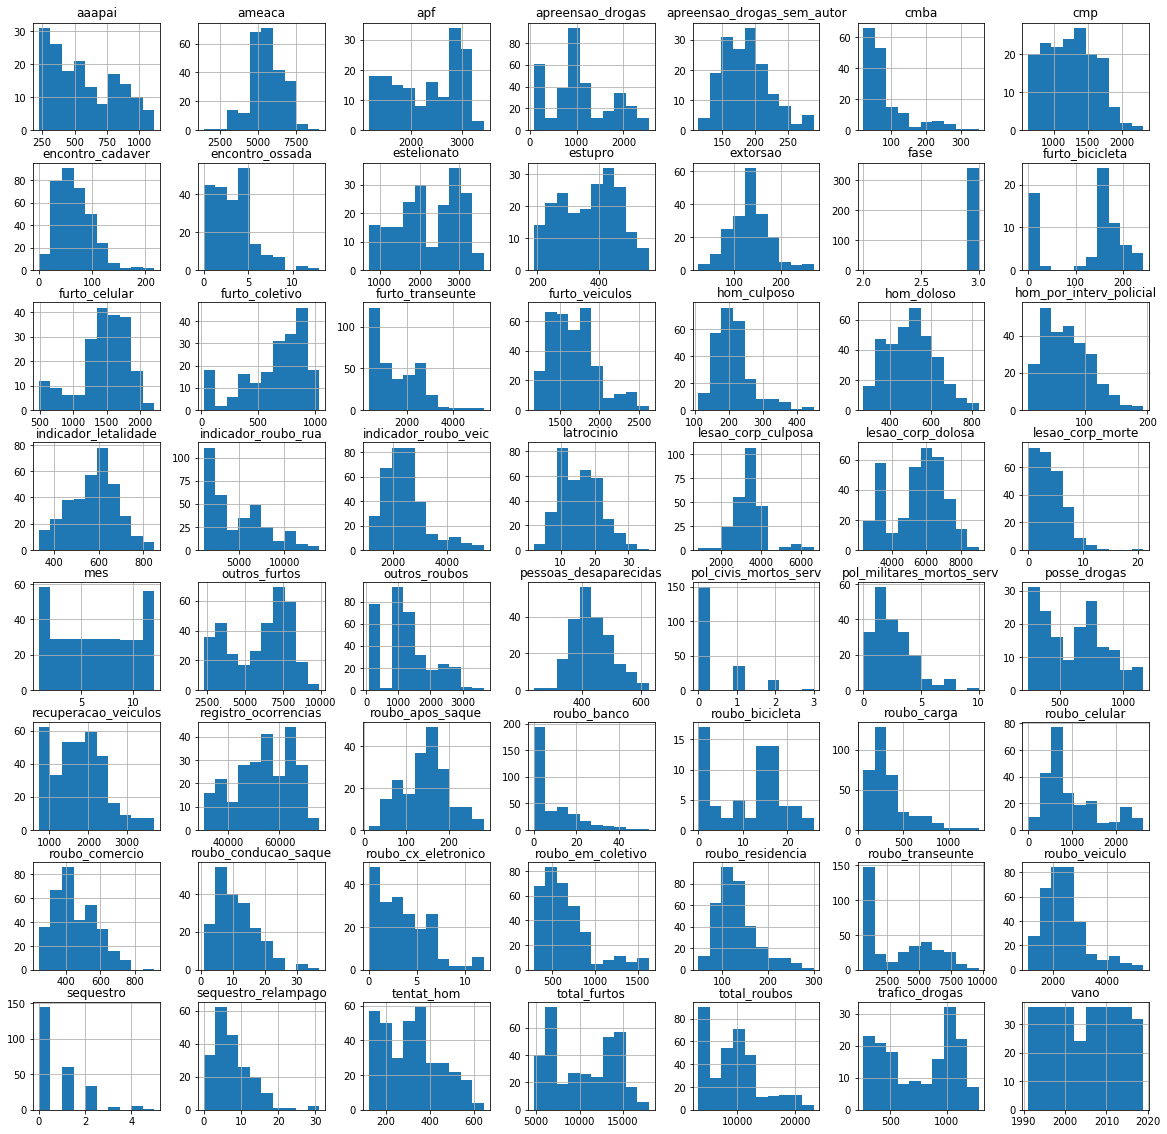

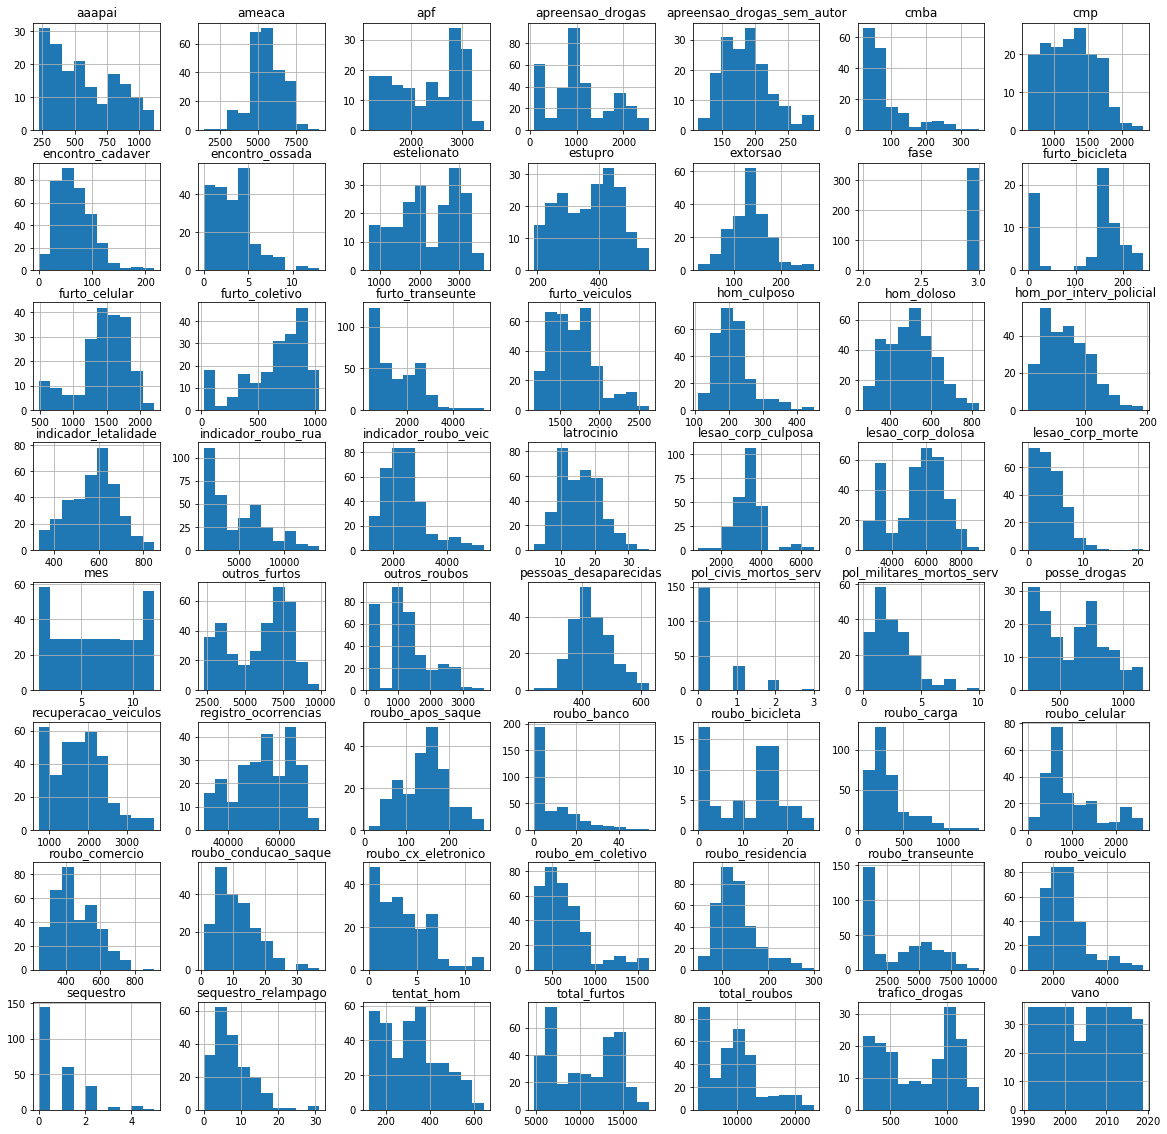

In [24]:
#plotando o gráfico de cada uma das 56 variáveis existentes:
df.hist(figsize = (20,20));

###Q5. Qual a média de Roubos, Furtos e Veiculos Recuperados?
Por que não começarmos a explorar nossas variáveis? Um dado interessante que me chamou a atenção foi o roubo e furto de veiculos. Pois em seu histograma, vemos valores elevados!

E a pergunta que fica é: qual a média desses valores nos meses desse dataset?

In [25]:
#Imprimindo a quantidade de Veículos Roubados:
print("Foram roubados {:.2f} veiculos por mês".format(df.roubo_veiculo.mean()))

#Imprimindo a quantidade de Veículos Furtados:
print("Foram furtados {:.2f} veiculos por mês".format(df.furto_veiculos.mean()))

#Imprimindo a quantidade de Veículos Recuperados:
print("Foram recuperados {:.2f} veiculos por mês".format(df.recuperacao_veiculos.mean()))

Foram roubados 2448.70 veiculos por mês
Foram furtados 1674.67 veiculos por mês
Foram recuperados 1772.24 veiculos por mês
Foram roubados 2448.70 veiculos por mês
Foram furtados 1674.67 veiculos por mês
Foram recuperados 1772.24 veiculos por mês


Achei interessante observar que menos da metade dos veículos são recuperados! Talvez possamos utilizar esse dado para uma analise futura.

###Q6. Ao decorrer dos anos, quantos % de veiculos foram recuperados?

Afinal, sabemos que a quantidade de veiculos recuperados são aproximadamente inferior que a metade dos veiculos perdidos. Sendo assim, a pergunta que fica é: qual a % exata de quantos veiculos foram recuperados de assaltos e furtos?

In [26]:
#Qual a % exata de quantos veiculos foram recuperados de assaltos e furtos?
veiculos_recuperados = df.recuperacao_veiculos.sum()/(df.roubo_veiculo.sum() + df.furto_veiculos.sum())

#Imprimindo essa quantidade:
print('Foram recuperados {:.2f}% dos veiculos perdidos'.format(veiculos_recuperados*100))

Foram recuperados 42.98% dos veiculos perdidos
Foram recuperados 42.98% dos veiculos perdidos


###Q7. Quais foram os máximos e mínimos mensais de Homicidio Doloso?
Afinal, quando pensamos na violência do Rio de Janeiro, qual a quantidade minima e máxima de Homicidio Doloso registrado em um mês?

In [27]:
#Imprimindo a quantidade máxima de Homicidio Doloso registrado em um mês:
print("O maximo de casos de Homicido Doloso em um mês foi: {}".format(df.hom_doloso.max()))

#Imprimindo a quantidade minima de Homicidio Doloso registrado em um mês:
print("O minimo de casos de Homicido Doloso em um mês foi: {}".format(df.hom_doloso.min()))

O maximo de casos de Homicido Doloso em um mês foi: 831
O minimo de casos de Homicido Doloso em um mês foi: 272
O maximo de casos de Homicido Doloso em um mês foi: 831
O minimo de casos de Homicido Doloso em um mês foi: 272


###Q8. Qual a distribuição de Homicidio Doloso?
Com a pergunta anterior, vimos uma variação entre 272 até 831 casos de Homicidio Doloso registrados no Rio de Janeiro. Mas como que está a consistência da distribuição desses dados? Para isso, utilizamos a função ".hist()" novamente.

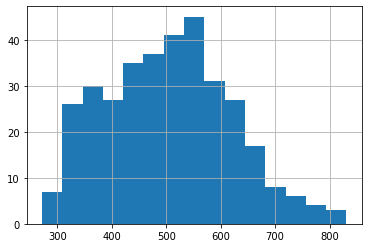

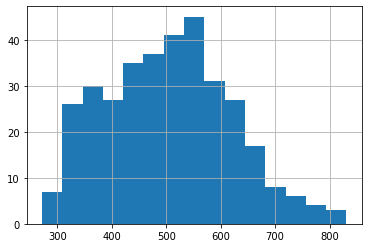

In [28]:
  #Imprimindo o Histograma de Homicidio Doloso em 15 barras:
  df.hom_doloso.hist(bins = 15);

###Q9. Qual a evolução de Roubo em Coletivo?


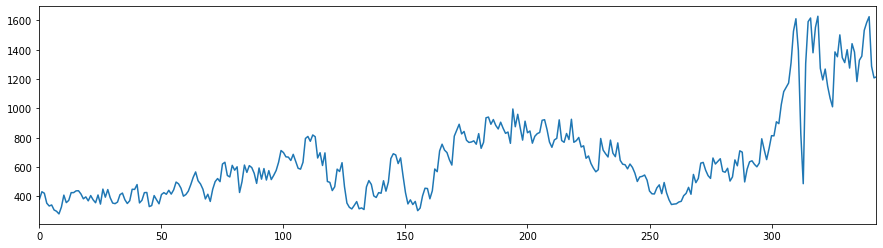

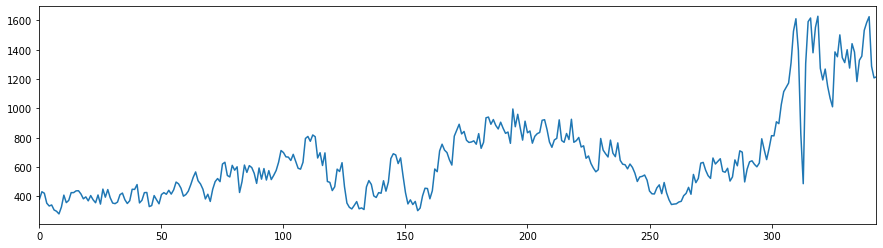

In [29]:
#Criando a figura com o Pyplot:
fig, ax = plt.subplots(figsize = (15,4))

#Imprimindo a evolução em meses do Roubo em Coletivo:
ax = df['roubo_em_coletivo'].plot()

Ao analisar a incidência de roubos no Rio de Janeiro, vemos que há um aumento ao decorrer dos meses. Podemos ainda ver que, proximo ao 300º mês, há uma queda repentina, mas porque? Sera que o data set possui uma constância cronológica nos seus dados?

###Q10. Qual a evolução da ocorrência de Veiculos Roubados?

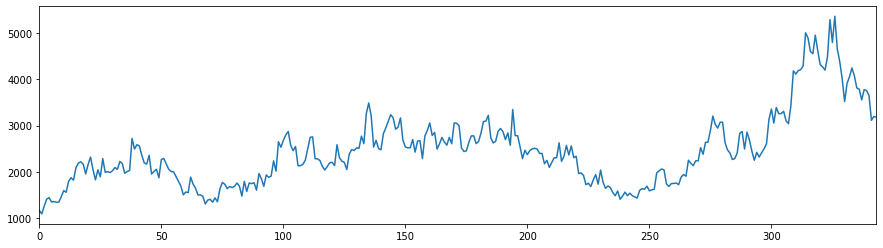

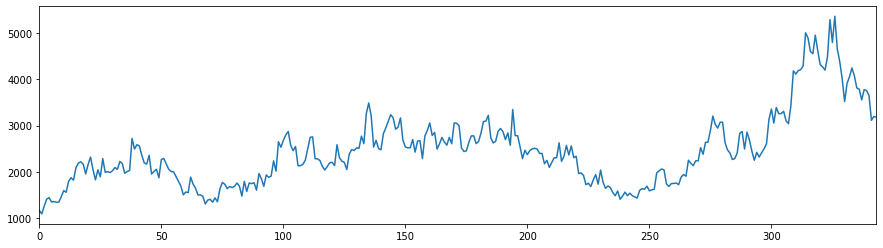

In [30]:
#Criando a figura com o Pyplot:
fig, ax = plt.subplots(figsize = (15,4))

#Imprimindo a evolução em meses do Roubo em Coletivo:
ax = df['roubo_veiculo'].plot()

###Q11. Os dados estão em ordem cronológica?
No gráfico de Roubo coletivo, vimos que há teve um valor fora do padrão. Por isso, levantamos uma duvida: será que o Dataset possui uma ordem cronológica nos seus dados?

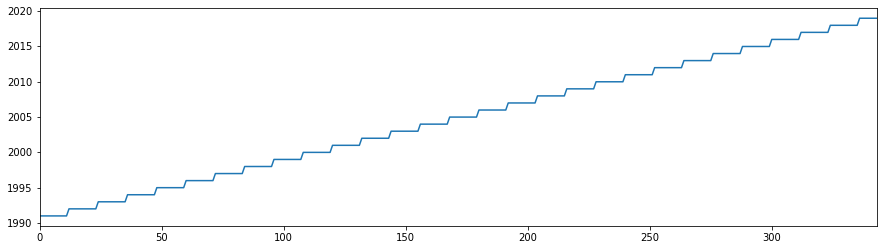

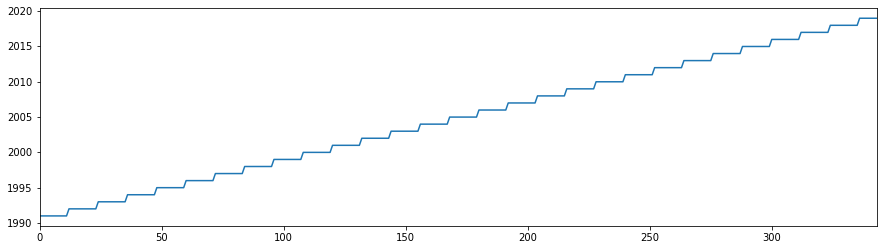

In [31]:
#Criando a figura com o Pyplot:
fig, ax = plt.subplots(figsize = (15,4))

#Imprimindo a evolução dos meses de acordo com as linhas no Dataset:
ax = df['vano'].plot()

##Explorando o Dataset por ano:
Para facilitar a visualização ou buscar uma outra otica desse Dataset, será interessante analisa-lo através das variações anuais. Isto é, no lugar de vermos a incidência de crimes cometidos mês a mês, vemos essa incidência ano após ano.

###Criando o Dataset df_ano:
O primeiro passo para isso é criar um Dataset (nesse caso chamado de 'df_ano') através da copia do nosso DataFrame inicial. Em seguida é somado as variaveis de acordo com o ano dela (variável 'vano').

In [32]:
#Criando o novo Dataframe através da copia de outro:
df_ano = df.copy()

#Retirando a coluna mês:
df_ano = df_ano.drop(['mes'], axis =1)

#Somando e agrupando os valores de ano ano:
df_ano = df_ano.groupby(['vano']).sum()

#Visualizando os primeiros 5 termos:
df_ano.head()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,7518,0.0,205,0.0,2250,39053,0.0,0.0,0.0,5806,2441,16452,1021,11090,4249,347,0.0,0.0,0.0,0.0,0.0,1378,42784,23979,10944,0.0,0.0,0.0,42288,77211,0.0,0.0,0.0,0.0,1866,0.0,0.0,0.0,9890,0.0,0.0,0.0,0.0,0.0,0.0,1459,0.0,0.0,0.0,7723,15339,16452,0.0,36
1992,7635,0.0,288,0.0,1910,38489,0.0,0.0,0.0,5466,3080,24502,1936,10814,4810,227,0.0,0.0,0.0,0.0,0.0,1337,52172,27619,10402,0.0,0.0,0.0,44625,82646,0.0,0.0,0.0,0.0,2043,0.0,0.0,0.0,11246,0.0,0.0,0.0,0.0,0.0,0.0,849,0.0,0.0,0.0,7923,15624,24502,0.0,36
1993,7720,0.0,265,0.0,1741,37633,0.0,0.0,0.0,3639,2605,24790,1701,9780,4722,225,0.0,0.0,0.0,0.0,0.0,1487,48949,26897,7488,0.0,0.0,0.0,42283,76668,0.0,0.0,0.0,0.0,1749,0.0,0.0,0.0,11619,0.0,0.0,0.0,0.0,0.0,0.0,792,0.0,0.0,0.0,7985,14502,24790,0.0,36
1994,8408,0.0,223,0.0,1766,35697,0.0,0.0,0.0,4403,2273,27470,1386,11653,4759,310,0.0,0.0,0.0,0.0,0.0,1704,53958,26231,6917,0.0,0.0,0.0,36343,69491,0.0,0.0,0.0,0.0,1830,0.0,0.0,0.0,16030,0.0,0.0,0.0,0.0,0.0,0.0,913,0.0,0.0,0.0,8631,16412,27470,0.0,36
1995,8438,0.0,200,0.0,1944,38469,0.0,0.0,0.0,3886,1625,23676,1198,11381,5126,440,0.0,0.0,0.0,0.0,0.0,1939,49271,21928,6414,0.0,0.0,0.0,31644,59986,0.0,0.0,0.0,0.0,3508,0.0,0.0,0.0,17622,0.0,0.0,0.0,0.0,0.0,0.0,1133,0.0,0.0,0.0,8638,16507,23676,0.0,36


,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,7518,0.0,205,0.0,2250,39053,0.0,0.0,0.0,5806,2441,16452,1021,11090,4249,347,0.0,0.0,0.0,0.0,0.0,1378,42784,23979,10944,0.0,0.0,0.0,42288,77211,0.0,0.0,0.0,0.0,1866,0.0,0.0,0.0,9890,0.0,0.0,0.0,0.0,0.0,0.0,1459,0.0,0.0,0.0,7723,15339,16452,0.0,36
1992,7635,0.0,288,0.0,1910,38489,0.0,0.0,0.0,5466,3080,24502,1936,10814,4810,227,0.0,0.0,0.0,0.0,0.0,1337,52172,27619,10402,0.0,0.0,0.0,44625,82646,0.0,0.0,0.0,0.0,2043,0.0,0.0,0.0,11246,0.0,0.0,0.0,0.0,0.0,0.0,849,0.0,0.0,0.0,7923,15624,24502,0.0,36
1993,7720,0.0,265,0.0,1741,37633,0.0,0.0,0.0,3639,2605,24790,1701,9780,4722,225,0.0,0.0,0.0,0.0,0.0,1487,48949,26897,7488,0.0,0.0,0.0,42283,76668,0.0,0.0,0.0,0.0,1749,0.0,0.0,0.0,11619,0.0,0.0,0.0,0.0,0.0,0.0,792,0.0,0.0,0.0,7985,14502,24790,0.0,36
1994,8408,0.0,223,0.0,1766,35697,0.0,0.0,0.0,4403,2273,27470,1386,11653,4759,310,0.0,0.0,0.0,0.0,0.0,1704,53958,26231,6917,0.0,0.0,0.0,36343,69491,0.0,0.0,0.0,0.0,1830,0.0,0.0,0.0,16030,0.0,0.0,0.0,0.0,0.0,0.0,913,0.0,0.0,0.0,8631,16412,27470,0.0,36
1995,8438,0.0,200,0.0,1944,38469,0.0,0.0,0.0,3886,1625,23676,1198,11381,5126,440,0.0,0.0,0.0,0.0,0.0,1939,49271,21928,6414,0.0,0.0,0.0,31644,59986,0.0,0.0,0.0,0.0,3508,0.0,0.0,0.0,17622,0.0,0.0,0.0,0.0,0.0,0.0,1133,0.0,0.0,0.0,8638,16507,23676,0.0,36


###Q12. Qual a distribuição das ocorrências ao ano?

Afinal, com esse novo Dataframe obtido, qual será essa distribuição das ocorrências? Que tipos de insights podemos retirar?

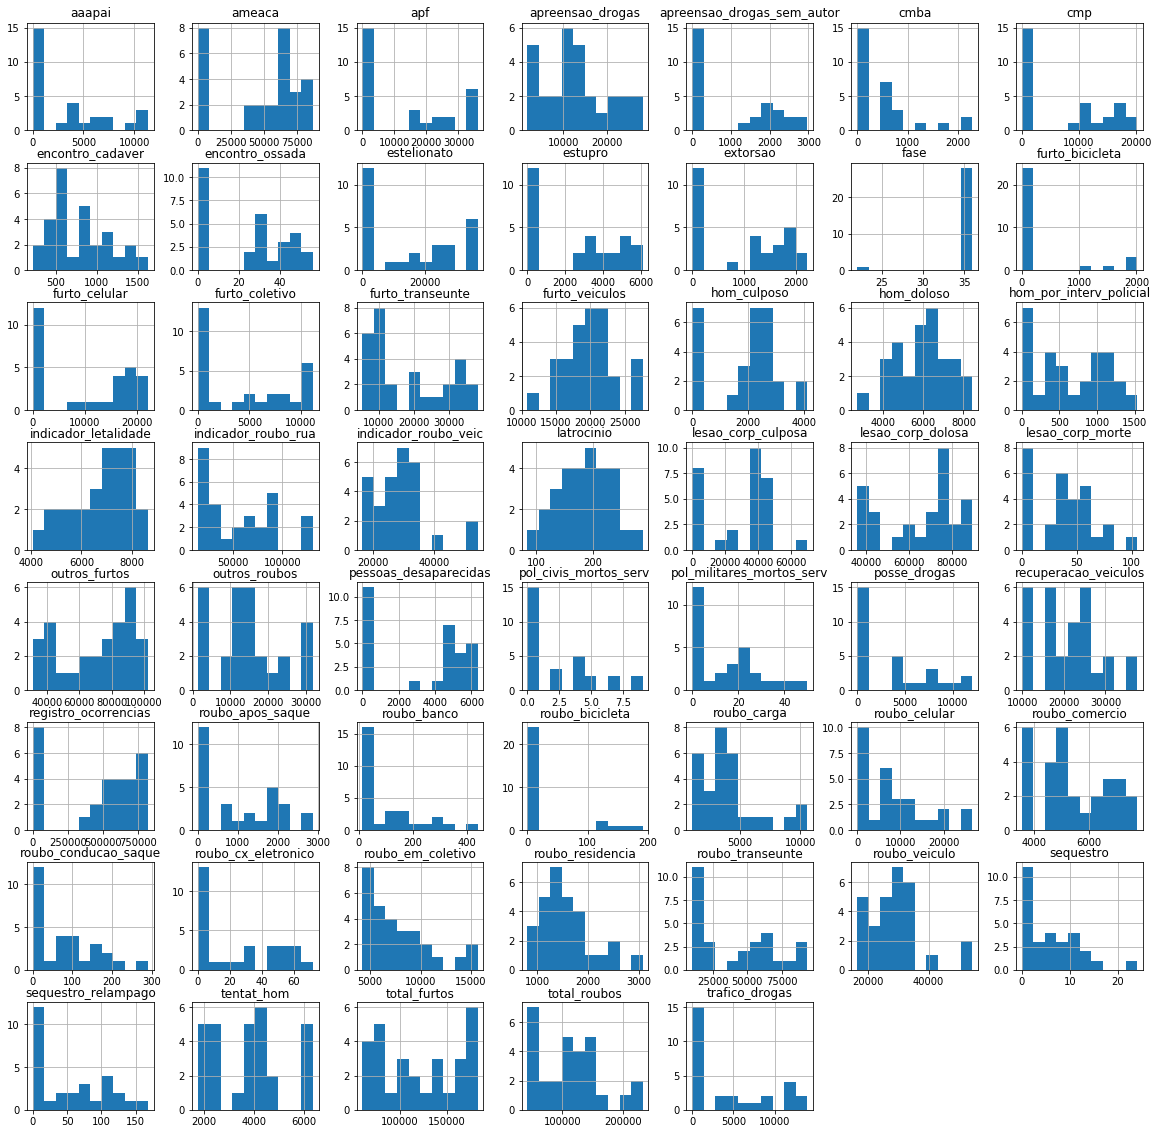

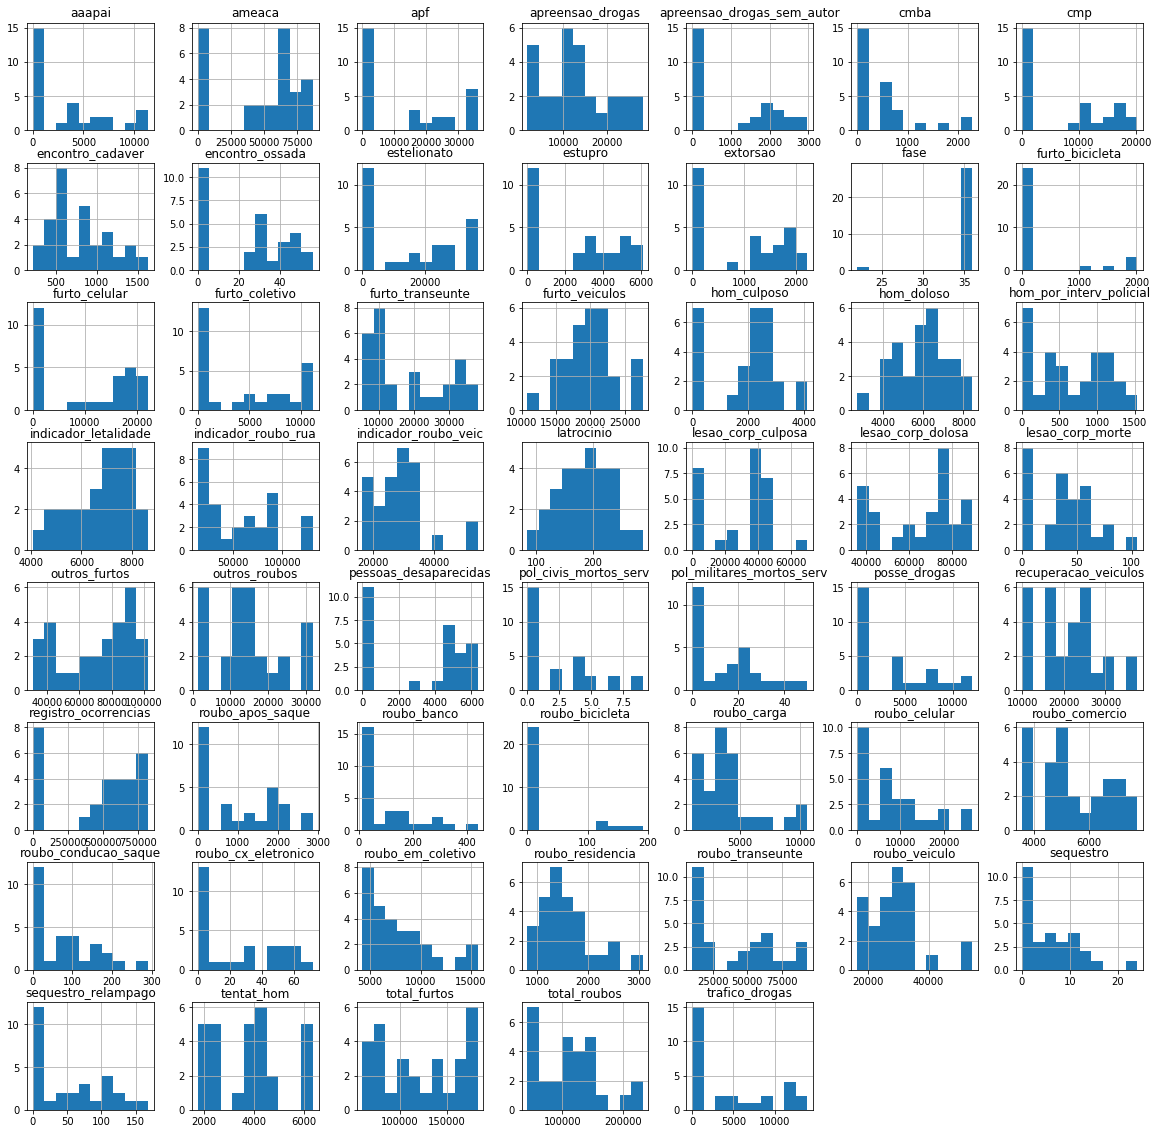

In [33]:
#plotando o gráfico de cada uma das 56 variáveis existentes:
df_ano.hist(figsize = (20,20));

###Q13. Qual a distribuição de latrocinio ao decorrer dos anos?

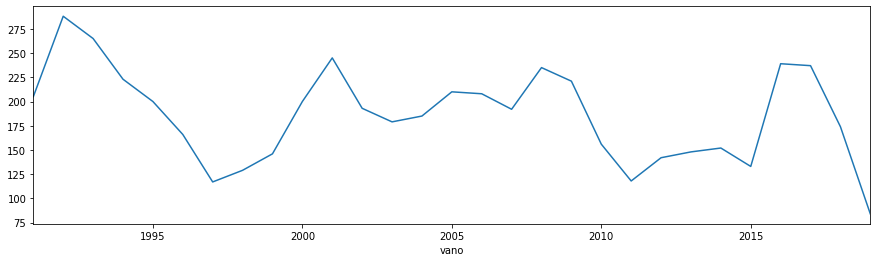

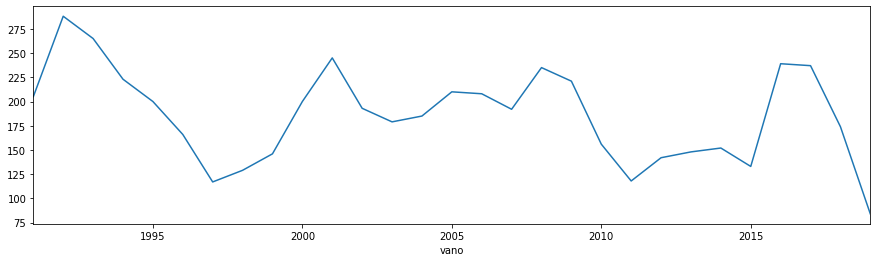

In [34]:
#Criando a figura com o Pyplot:
fig, ax = plt.subplots(figsize = (15,4))

#Imprimindo a evolução do latrocinio ao decorrer dos anos:
ax = df_ano['latrocinio'].plot()

Podemos observar aqui que no decorrer dos anos, tivemos altas e baixas na incidência dessas ocorrências e que, no nosso ultimo ano, tivemos uma queda brusca no valor de Latriocinio.

###Q14. Qual o valor Máximo de Latrocinio? 
Uma observação interessante ao analisar um gráfico é entender as escalas que estão sendo utilizados. Nesse caso, vemos que o maior valor apresentado no gráfico é de 275, e que há um valor que está ultrapassando esse resultado.

Para descobrirmos esse valor utilizamos a função ".max()".

In [35]:
#Imprimindo o Valor Máximo de Latrocinio:
print(df_ano['latrocinio'].max())

288


###Q15. Quanto que o Valor de Latrocinio de 2016 representa em relação ao maximo?
E se quisermos pegar um valor especifico, como é o caso do ano de 2016 e compararmos com o valor máximo citado anteriormente? Quanto que a incidência de latrocinio representa em % sobre o valor máximo?

In [44]:
#Imprimindo o valor de Latrocinio para o ano de 2016:
print("Em 2016 tivemos {} ocorrências".format(df_ano.loc[2016, 'latrocinio']))

#Imprimindo a % que a incidência em 2016 representa sobre o valor máximo:
print("Esse valor, representa {:.2f}%".format(df_ano.loc[2016, 'latrocinio']/df_ano['latrocinio'].max()*100))

Em 2016 tivemos 239 ocorrências
Esse valor, representa 82.99%


###Q16. Qual a quantidade de pessoas desaparecidas ao decorrer dos anos?
No começo do nosso DataFrame vimos também com a função ".info()" a quantidade de valores presentes em cada uma das variáveis. E vimos que algumas das variáveies possuem valores ausentes para esses resultados. Vamos ver a variável de pessoas desaparecidas:

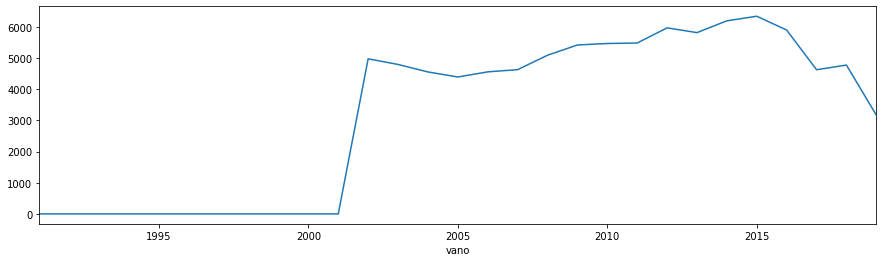

In [37]:
#Criando a figura com o Pyplot:
fig, ax = plt.subplots(figsize = (15,4))

#Imprimindo a quantidade de pessoas desaparecida ao decorrer dos anos:
ax = df_ano['pessoas_desaparecidas'].plot()

Pelo gráfico, podemos notar que até o ano de 2001 não houve um registro de pessoas desaparecida, esse evento pode ter acontecido pela falta de obtenção dos dados naquela época. A presença recorrente de veriáveis ausentes pode indicar uma mudança de metodologia.

Lembrando que ao decorrer dos próximos anos pode acontecer de que novas variáveis e novos dados sejam inseridos. Podendo agregar ainda mais a nossa análise.

##Explorando a Taxa de Retorno de Veiculos ao decorrer dos anos:
Voltando a taxa de Retorno dos Veiculos que foram roubados ou furtados, tive o interesse de descobrir como que foi o desempenho dessa recuperação de veiculos ao decorrer dos ultimos anos. Para isso, criaremos uma lista que irá conter esses valores desejados:

In [46]:
#Criando as listas com a taxa de Retorno e ano:
df_taxa_retorno = list()
ano = list()

#Laço de repetição para calcular a taxa ano após ano e adicionar nas listas.
for i in range (2000, 2019):
  taxa = (df_ano.loc[i, 'recuperacao_veiculos']/(df_ano.loc[i,'roubo_veiculo'] + df_ano.loc[i,'furto_veiculos'])*100).round(2)
  ano.append(i)
  df_taxa_retorno.append(taxa)

#Observando inicialmente o resultado obtido:
df_taxa_retorno = pd.Series(df_taxa_retorno, index = ano)
df_taxa_retorno.head()

2000    48.18
2001    51.35
2002    56.11
2003    56.00
2004    51.14
dtype: float64

###Q17. Qual a taxa de Veículos Recuperados ao decorrer dos anos?

Com a nossa lista criada, podemos agora imprimir um gráfico mostrando a evolução dessa taxa de veiculos recuperados de Assaltos e Furtos.

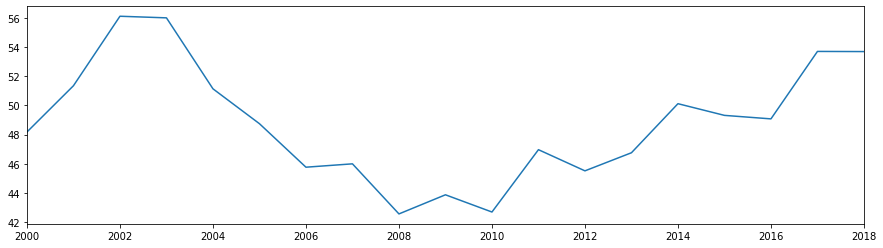

In [39]:
#Criando a figura com o Pyplot:
fig, ax = plt.subplots(figsize = (15,4))

#Evolução ano a ano da taxa de veiculos recuperados:
ax = df_taxa_retorno.plot()

O interessante de analisar esse gráfico é perceber que há uma melhoria nos anos iniciais e uma queda repetina, mas sempre os valores estão variando entre 42% até 56%.

##Explorando Dados Mais Recentes:
E se quisermos ver a partir de agora um DataFrame com os dados mais recentes? Para isso retirei todas as linhas quando a variável 'roubo_bicicleta' se mostrava ausente. Sobrando apenas dados apartir de 2014.

In [40]:
#Copiando o DataFrame original:
df_limpo = df.copy()

#Retirando os anos em que a variável 'roubo_bicicleta' não foi computada:
df_limpo.dropna(subset = ['roubo_bicicleta'], axis = 0, inplace = True)

#Agrupando por ano e retirando a coluna mês:
df_limpo = df_limpo.drop(['mes'], axis = 1)
df_limpo = df_limpo.groupby(['vano']).sum()

#Imprimindo o Dataframe:
df_limpo

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,4942,41.0,152,584.0,6366,87561,5676.0,2080.0,46599.0,7742,1305,32651,5890,80461,7314,28,44.0,7758.0,100.0,1415.0,0.0,13287,157995,17683,35524,11144.0,15533.0,0.0,102456,182340,1.0,1807.0,168.0,34770.0,26933,12063.0,12428.0,2976.0,25227,34816.0,11189.0,20179.0,771.0,87399.0,6201.0,545,33.0,18.0,0.0,5719,95533,32651,818727.0,36
2015,4200,32.0,133,645.0,6009,77376,4887.0,1784.0,40371.0,6756,1188,31035,7225,65437,7805,27,33.0,12038.0,83.0,1418.0,118.0,14770,147933,16944,38348,10774.0,19187.0,1086.0,93506,179845,4.0,2028.0,133.0,35595.0,28089,12062.0,13961.0,2614.0,23663,36032.0,10364.0,20202.0,894.0,74932.0,6348.0,533,48.0,23.0,2.0,5010,85280,31035,777356.0,36
2016,5042,56.0,239,925.0,6055,70023,4705.0,1783.0,34950.0,7288,1318,41696,9874,93818,13731,24,51.0,19549.0,72.0,777.0,191.0,20392,208781,16759,29275,10252.0,17574.0,2013.0,93365,169238,12.0,1613.0,69.0,36912.0,25016,9959.0,13256.0,2264.0,28690,35745.0,10101.0,16331.0,1143.0,64848.0,5905.0,541,37.0,38.0,2.0,6262,127098,41696,806042.0,36
2017,5346,39.0,237,1127.0,6001,60555,4952.0,2112.0,26872.0,6600,1258,54366,10599,85993,15273,22,60.0,24380.0,56.0,690.0,146.0,30994,230437,15708,19163,7541.0,15627.0,1924.0,85327,145290,8.0,1457.0,111.0,29472.0,21312,7582.0,12173.0,1971.0,37630,33355.0,7545.0,16900.0,1667.0,51035.0,4631.0,377,25.0,31.0,4.0,6749,125646,54366,750607.0,36
2018,4950,56.0,174,1534.0,6242,63282,5310.0,1957.0,27520.0,6437,1249,52097,9182,88422,15660,21,58.0,26538.0,83.0,941.0,159.0,30759,231606,15794,20440,8316.0,15718.0,1901.0,81701,143870,4.0,1554.0,107.0,34493.0,21626,7963.0,12034.0,2026.0,36448,33548.0,6546.0,15780.0,2281.0,56009.0,4780.0,350,27.0,28.0,4.0,6714,130620,52097,770467.0,36
2019,2717,24.0,84,1249.0,3853,42335,3592.0,1239.0,18274.0,3556,804,28012,5277,55717,11136,13,24.0,18660.0,84.0,683.0,121.0,17385,141472,10812,14279,5411.0,12094.0,1563.0,61336,105495,0.0,1130.0,67.0,26178.0,15572,5950.0,8449.0,1486.0,19387,24179.0,4174.0,12938.0,2140.0,40592.0,3173.0,218,30.0,14.0,0.0,4074,85513,28012,535113.0,22


###Q18. Quais são as correlações entre as variáveis mais recentes?
Agora com esse novo DataFrame, podemos verificar a correlação de variáveis.

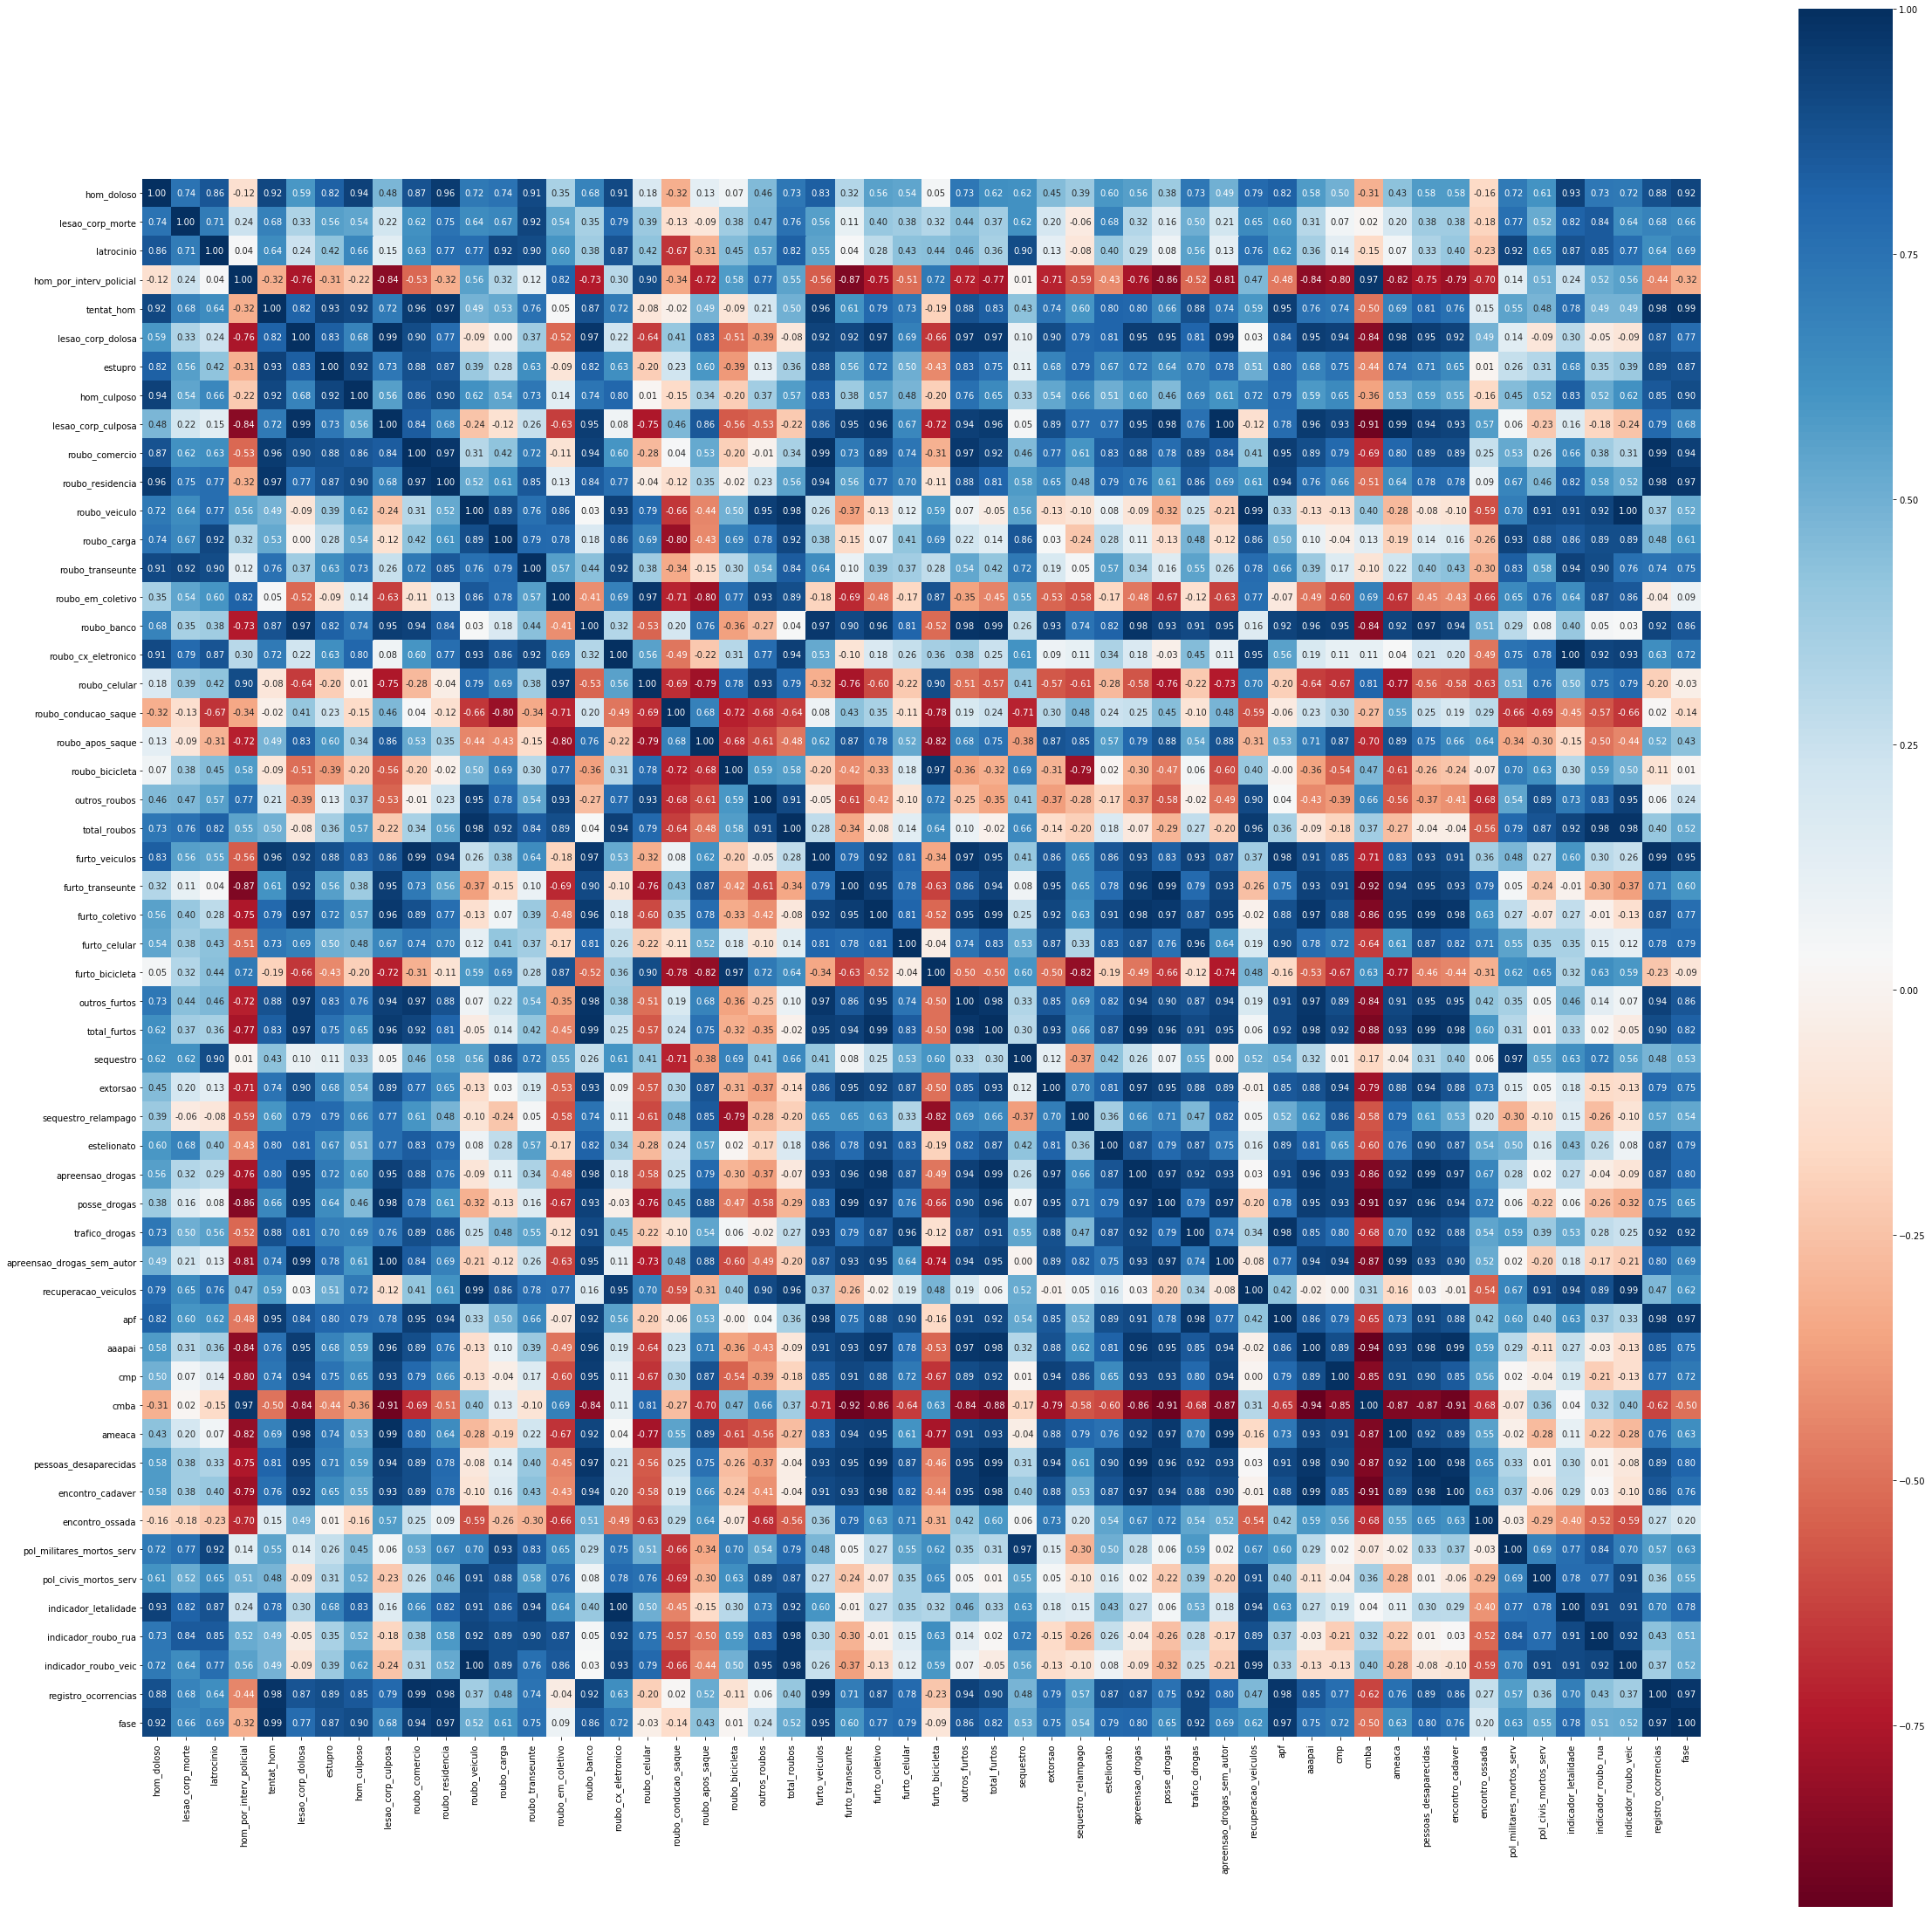

In [41]:
fig, ax = plt.subplots(figsize = (40,40))

ax = sns.heatmap(df_limpo.corr(), cmap = 'RdBu', fmt = '.2f', square = True, annot = True, ax = ax)

##Conclusão

Essa análise é uma parte introdutória do que podemos analisar esse imenso conjunto de dados. Com o Heatmap das correlações podemos esperar que alguns crimes sejam cometidos quando outros não são. Ou que alguns crimes sejam cometidos pois outros estão sendo. 

A intenção desse notebook não é fazer uma análise profunda desses dados como um todo, apenas explorar e buscar novas ou outras visões apresentadas no Curso de Data Science na Pratica.